### Load packages
First we need to load the python packages that are required to perform the analysis

In [1]:
%matplotlib inline

import os
import rasterio
import numpy 
import pandas
import scipy.io # to load the matlab files

import matplotlib.pyplot as plt

from DamageScanner import DamageScanner # the tool to estimate the losses

data_path = os.path.join('..','Data')

### Set paths to data and load initial data

All the data is stored in the *Data* folder, so we are creating paths to load data from that folder. We will create a dictionary with the depth-damage information required to do the analysis.

In [2]:
# function to load DDM data
def read_DDM_input(DDM_data_path):
    DDM_data = {}
    DDM_data['Curves_structure'] = pandas.read_excel(DDM_data_path,sheet_name='curves_structure').values
    DDM_data['Curves_content'] = pandas.read_excel(DDM_data_path,sheet_name='curves_content').values
    DDM_data['MaxDam_structure'] = pandas.read_excel(DDM_data_path,sheet_name='maxdam_structure').values
    DDM_data['MaxDam_content'] = pandas.read_excel(DDM_data_path,sheet_name='maxdam_content').values  
    DDM_data['Landuse_names'] = dict(pandas.read_excel(DDM_data_path,sheet_name='landuse_list').values)  
    
    return DDM_data

In [3]:
inundation_map = os.path.join(data_path,'flood_map.tif') # the land-use map
landuse_map = os.path.join(data_path,'landuse.tif') # the land-use map
DDM_data = read_DDM_input(os.path.join(data_path,'DDM_data.xlsx'))

### Run the DamageScanner. We run it for both the structure and the content

In [4]:
# run the DamageScanner for the building structures
damage_structure,damagebin_structure = DamageScanner(landuse_map,inundation_map,DDM_data['Curves_structure'],
                                                     DDM_data['MaxDam_structure'])

# run the DamageScanner for the content
damage_content,damagebin_content = DamageScanner(landuse_map,inundation_map,DDM_data['Curves_content'],
                                                     DDM_data['MaxDam_content'])
# summarize both
damage_total = damage_content+damage_structure
damagebin_total  = pandas.DataFrame(pandas.concat([pandas.DataFrame(damagebin_structure['losses']), pandas.DataFrame(damagebin_content['losses'])], axis=1).fillna(0).sum(axis=1),columns=['losses'])
damagebin_total = pandas.concat([damagebin_total,damagebin_structure[['area','avg_depth']]],axis=1)
damagebin_total.index = damagebin_total.index.astype(int)
damagebin_total.index = damagebin_total.index.map(DDM_data['Landuse_names'])

#print output
print('{} Euro damage for a 1/1000 flood event'.format(damage_total))

761494900.8874898 Euro damage for a 1/1000 flood event


### Create a figure of the total damage per land use

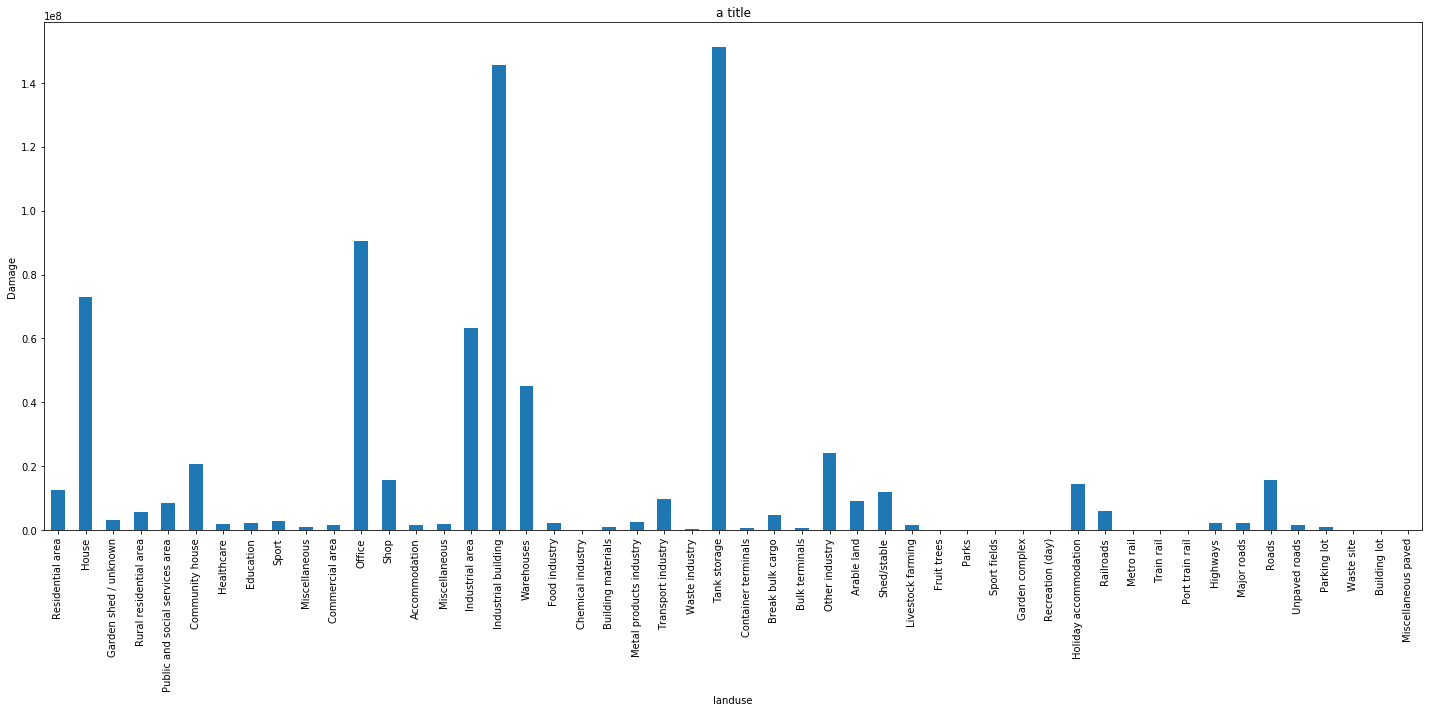

In [5]:
#you may consider only plotting the land-use classes that have a value greater 
#than zero. If so, remove the hashtag from the line below.
damagebin_total = damagebin_total[damagebin_total.losses != 0]

plt.figure(figsize=(20,10))
plt.xticks(rotation=90) # add configurations
plt.xlabel('Landuse') # add configurations
plt.ylabel('Damage') # add configurations

plt.yticks() # add configurations
plt.xticks() # add configurations

plt.title('a title') # add configurations

damagebin_total['losses'].plot(kind='bar') # add configurations such as color or lining

plt.tight_layout()
output_path = os.path.join(data_path,'..','output')
plt.savefig(os.path.join(output_path,'1000yeardamage.png'),dpi=300)

### Translate land-use classes to economic sectors
We will focus in the remainder of the assignment on the impact of 
the industrial sectors to the economy the Rotterdam area

In [18]:
industries = damagebin_total.iloc[15:29,:]
industries

,losses,area,avg_depth
landuse,,,
Industrial area,6.317251e+07,138696.0,79.354365
Industrial building,1.454951e+08,7111.0,71.117846
Warehouses,4.499488e+07,3290.0,58.995441
Food industry,2.134903e+06,341.0,24.146628
Chemical industry,9.840600e+04,5.0,194.400000
Building materials,1.022338e+06,155.0,15.735484
Metal products industry,2.614563e+06,103.0,253.669903
Transport industry,9.750254e+06,1173.0,38.150043
Waste industry,5.626200e+05,53.0,37.169811


In [16]:
sector_codes = ['A','B','C1','C2','C3','C4','C5','C6','C7','C8','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T']
full_sector_names = ['Agriculture, forestry and fishing','Quarrying',
'General Industry','Food industry','Oil refinery','Chemical & biobased industry','Basic metal-metal products industry',
'Means of transport ind. and maritime service','Electricity generation','Other Industry',
'Construction industry','Trade','Transport and storage','Catering industry',
'Information and communication','Financial services','Rental and trading of real estate',
'Specialist Business Services','Rental and other business services','Public administration and government services',
'Education','Health and welfare care','Culture, sport and recreation','Other services','Household services']

sector_dict = dict(zip(sector_codes,full_sector_names))

In [17]:
mapping_dict = {'Industrial area':'C1','Industrial building':'C1','Warehouses':'H',
                'Food industry':'C2','Chemical industry':'C4','Building materials','F',
               'Metal products industry':'C5','Transport industry','H','Waste industry',''}

{'A': 'Agriculture, forestry and fishing',
 'B': 'Quarrying',
 'C1': 'General Industry',
 'C2': 'Food industry',
 'C3': 'Oil refinery',
 'C4': 'Chemical & biobased industry',
 'C5': 'Basic metal-metal products industry',
 'C6': 'Means of transport ind. and maritime service',
 'C7': 'Electricity generation',
 'C8': 'Other Industry',
 'F': 'Construction industry',
 'G': 'Trade',
 'H': 'Transport and storage',
 'I': 'Catering industry',
 'J': 'Information and communication',
 'K': 'Financial services',
 'L': 'Rental and trading of real estate',
 'M': 'Specialist Business Services',
 'N': 'Rental and other business services',
 'O': 'Public administration and government services',
 'P': 'Education',
 'Q': 'Health and welfare care',
 'R': 'Culture, sport and recreation',
 'S': 'Other services',
 'T': 'Household services'}